In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Write a python code that finds a and b for a given data set.

In [2]:
x, y=np.loadtxt('datos.txt', unpack=True).T

In [3]:
ybar=np.mean(y)
xbar=np.mean(x)
n=len(x)

In [4]:
a=(np.sum(x*y)-n*xbar*ybar)/(np.sum(x**2)-n*xbar**2)
b=(ybar*np.sum(x**2)-xbar*np.sum(x*y))/(np.sum(x**2)-n*xbar**2)
a,b

(10.000000000000025, 4.9999999999999822)

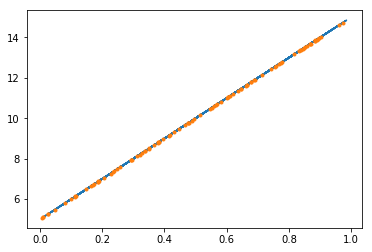

In [5]:
m=np.random.random(len(x))
plt.plot(m,a*m+b,'-')
plt.plot(x,y,'.')

# Show explicitly that the linear least square method is derived from the mininimization of the chisquare when the model is a straigh

 Tenemos que 
\begin{equation} 
\chi^{2}=\sum(y_{i}-y(x_{i},\theta))^{2}/\sigma_{y_[i}}^{2}
\end{equation}